In [13]:
import numpy as np  # NumPy for numerical computations (arrays, matrices)
import pandas as pd  # pandas for data manipulation (DataFrames)
import matplotlib.pyplot as plt  # matplotlib for visualizations (plots)
import seaborn as sns  # seaborn for enhanced visualizations (built on top of matplotlib)

In [2]:
from sklearn.metrics import confusion_matrix  # Visualize model predictions vs. true labels
from sklearn.metrics import accuracy_score, recall_score, f1_score 

In [3]:
df = pd.read_csv('Heart_disease_cleveland_new.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

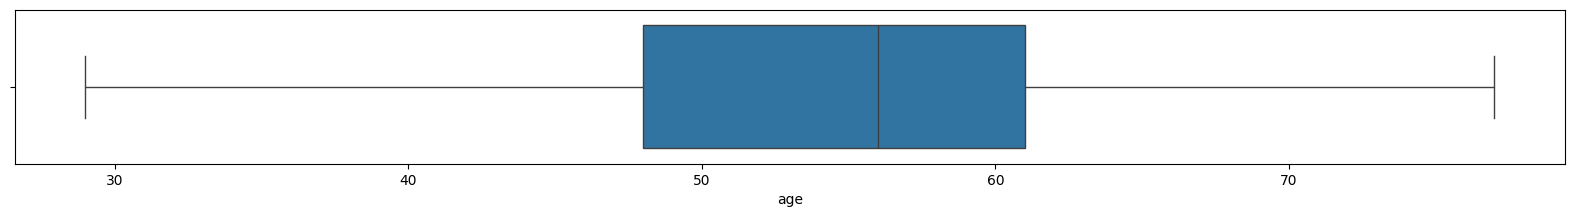

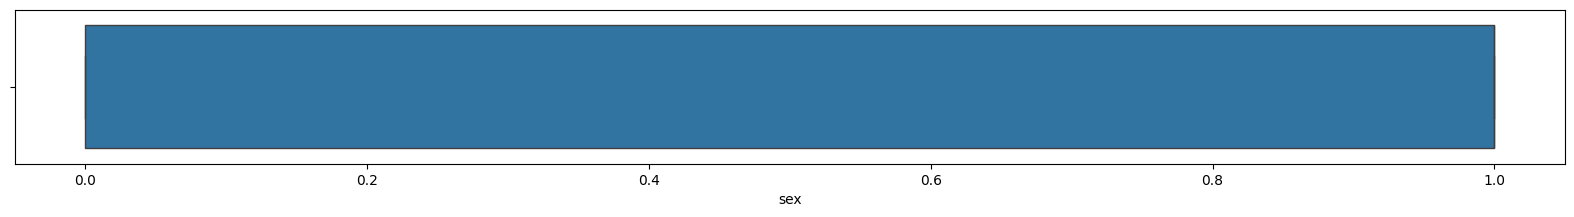

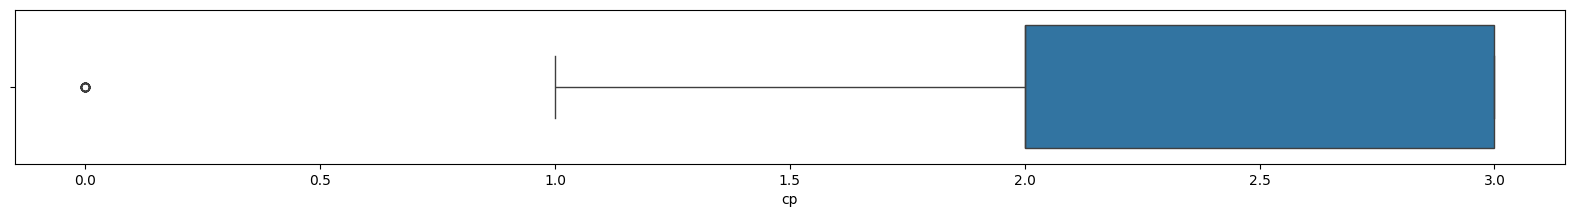

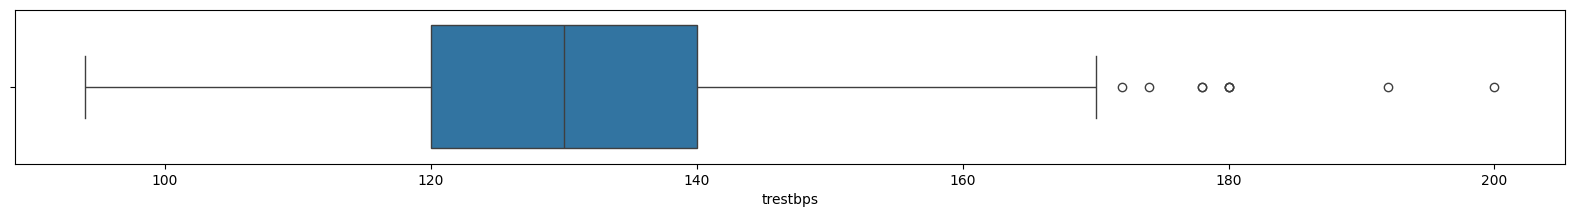

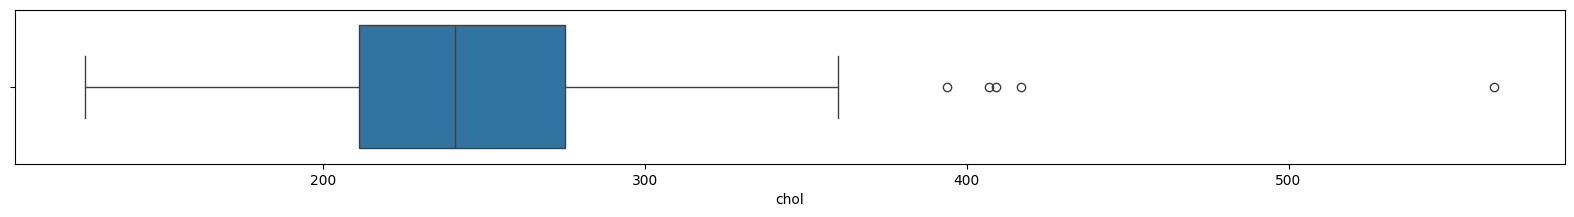

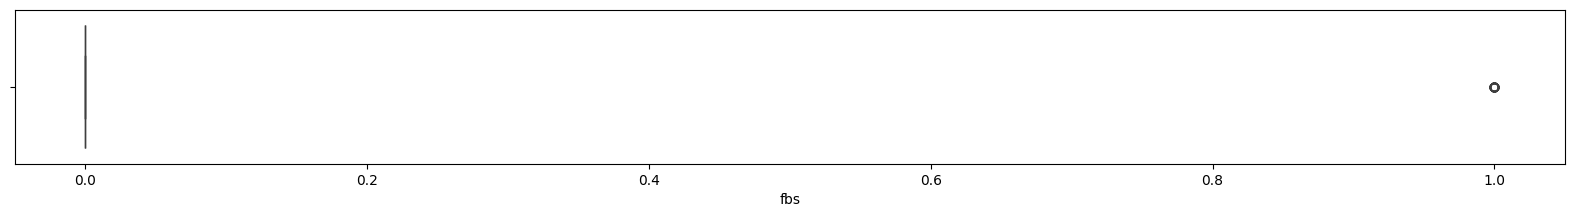

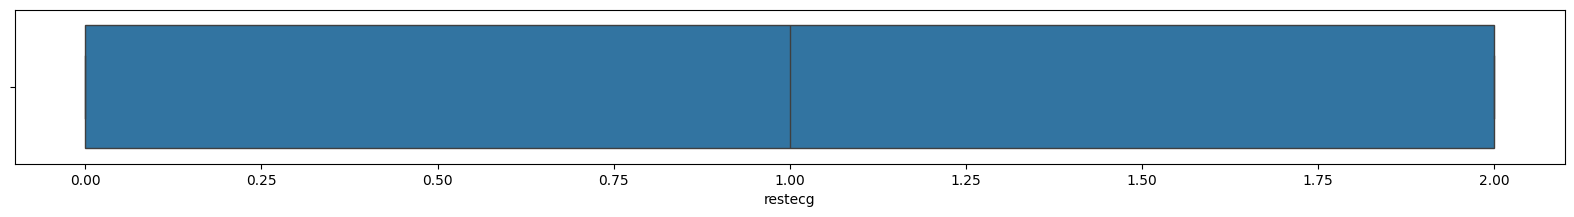

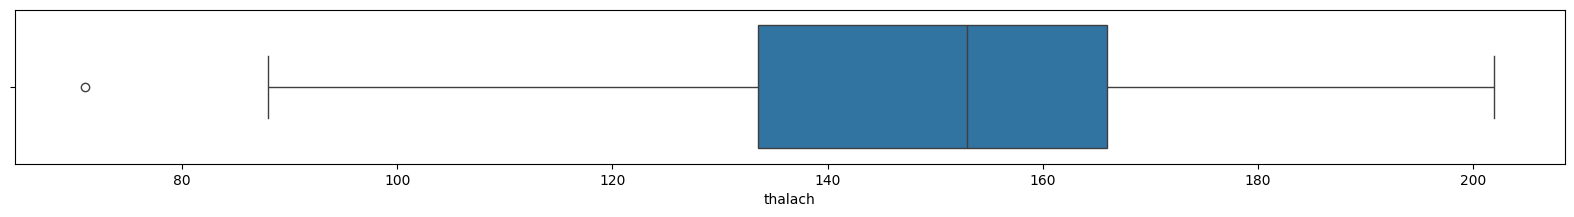

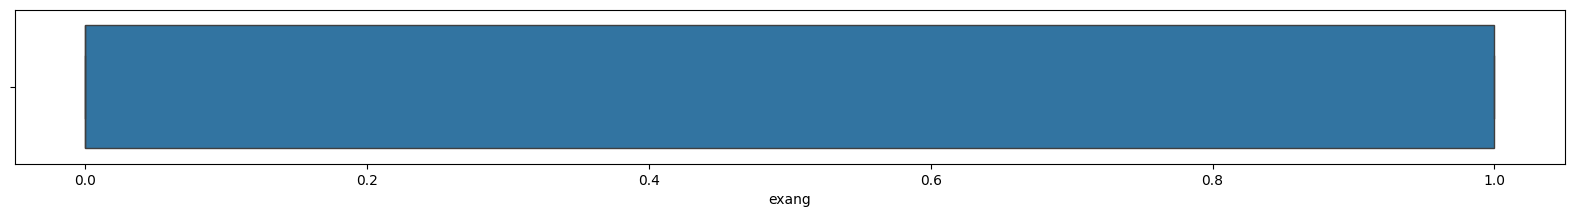

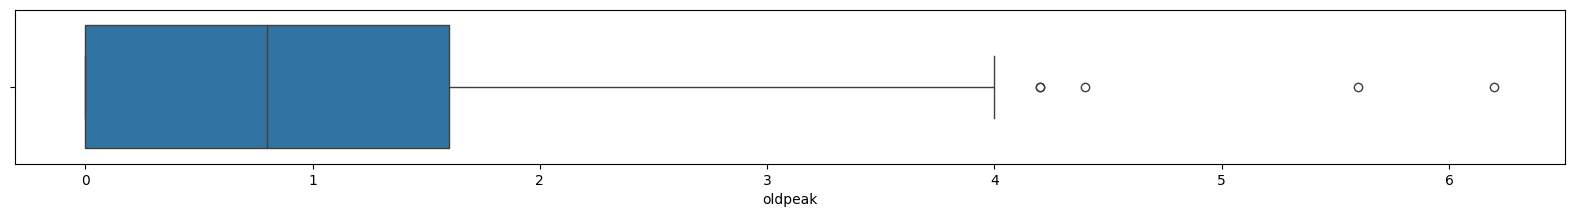

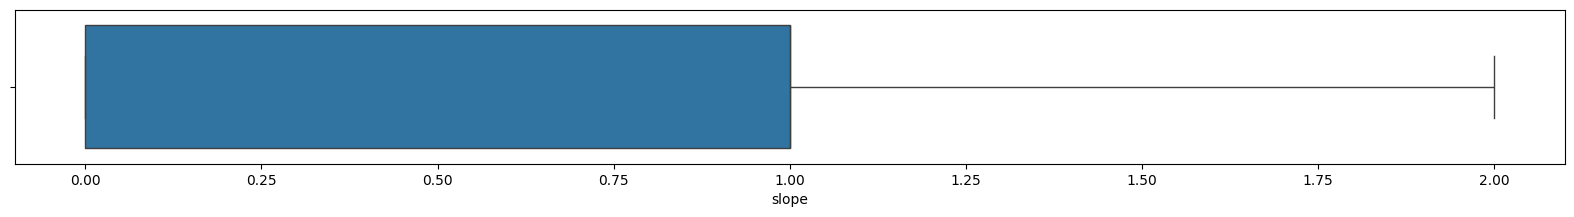

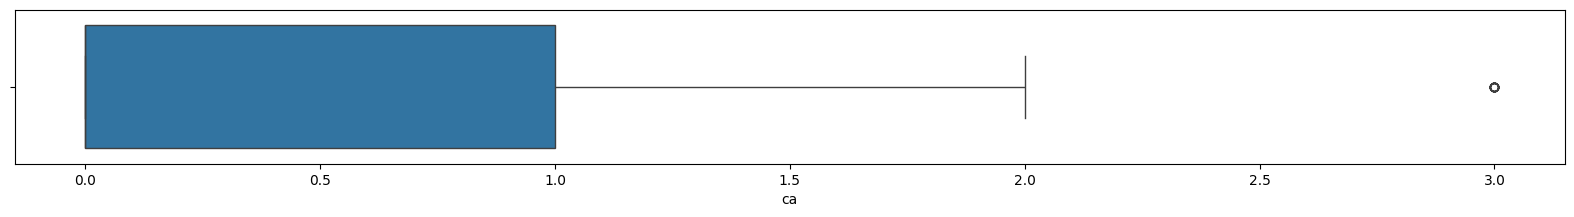

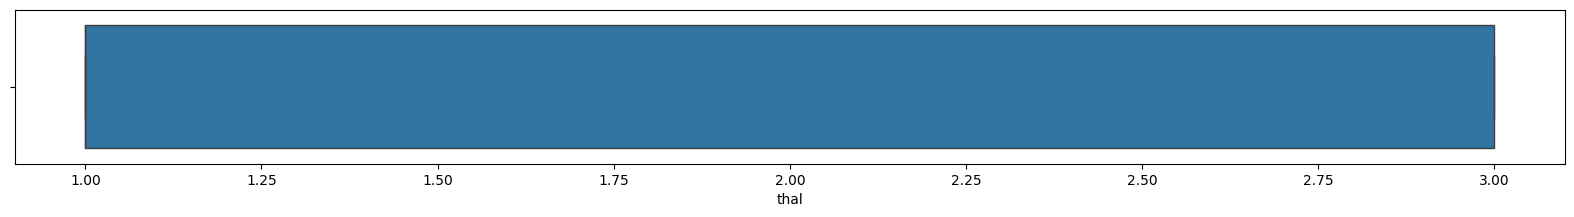

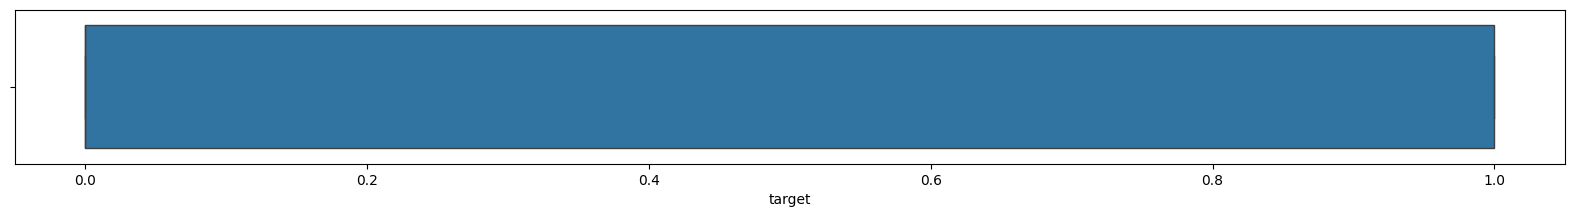

In [7]:
df_outlier = df
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [8]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
iqr

age         13.0
sex          1.0
cp           1.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      2.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         2.0
target       1.0
dtype: float64

In [9]:
df = df[~((df< q1 - 1.5 * iqr) | (df > q3 + 1.5 * iqr)).any(axis=1)]

### VISUALISASI

<Axes: xlabel='target', ylabel='count'>

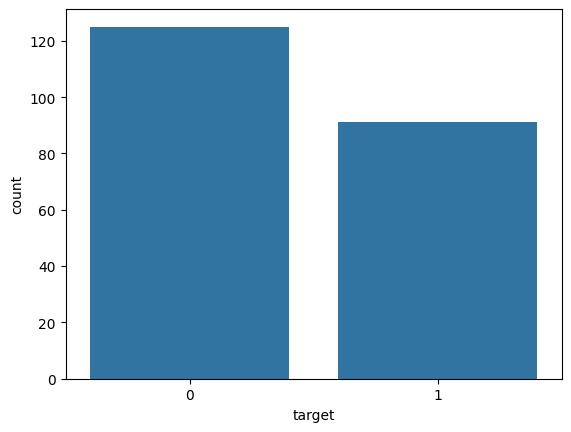

In [10]:
sns.countplot(x = 'target', data = df)
#jika 1 terkena penyakit jika 0 sehat (tidak terkena penyakit)

<Axes: xlabel='age', ylabel='count'>

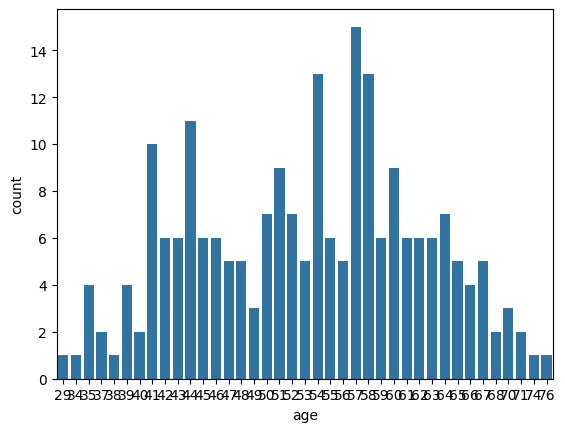

In [11]:
sns.countplot(x = 'age', data = df)

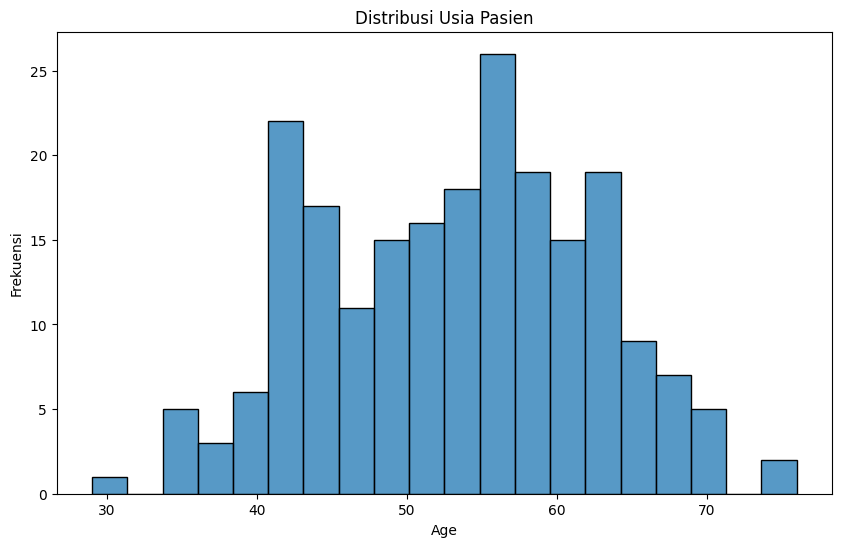

In [12]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', bins=20)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.show()

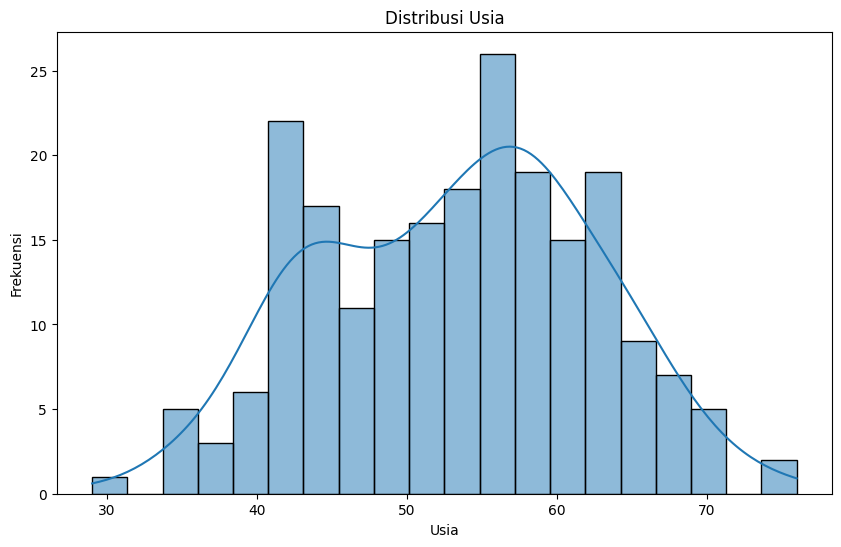

In [13]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

In [14]:
#mencari nilai max umur pasien
nilai_maks = df['age'].max()
print("Umur max pasien:", nilai_maks)

Umur max pasien: 76


In [15]:
#mencari nilai min umur pasien
nilai_min = df['age'].min()
print("Umur minimal pasien:", nilai_min)

Umur minimal pasien: 29


In [16]:
#melihat data dan memunculkan colom baru yaitu kategori_usia
bins = [29, 39, 76]
labels = [ 'Dewasa', 'Lansia']
df['kategori_usia'] = pd.cut(df['age'], bins=bins, labels=labels)

print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
2     67    1   3       120   229    0        2      129      1      2.6   
3     37    1   2       130   250    0        0      187      0      3.5   
4     41    0   1       130   204    0        2      172      0      1.4   
5     56    1   1       120   236    0        0      178      0      0.8   
6     62    0   3       140   268    0        2      160      0      3.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
295   41    1   1       120   157    0        0      182      0      0.0   
297   57    0   3       140   241    0        0      123      1      0.2   
300   57    1   3       130   131    0        0      115      1      1.2   
301   57    0   1       130   236    0        2      174      0      0.0   
302   38    1   2       138   175    0        0      173      0      0.0   

     slope  ca  thal  target kategori_usia  
2        1   2     3       1        Lansia

/tmp/ipykernel_2295867/2031469049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kategori_usia'] = pd.cut(df['age'], bins=bins, labels=labels)


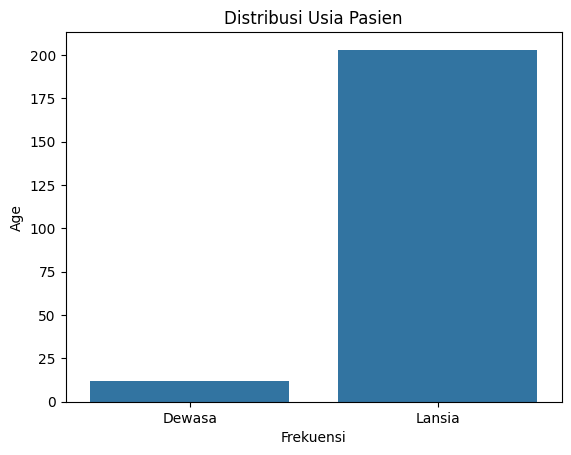

In [17]:
sns.countplot(x='kategori_usia', data=df)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Frekuensi')
plt.ylabel('Age')
plt.show()

In [18]:
# melihat jumlah pasien dewasa dan lansia
jumlah_dewasa = df['kategori_usia'].value_counts()['Dewasa']
jumlah_lansia = df['kategori_usia'].value_counts()['Lansia']

print("Jumlah dewasa:", jumlah_dewasa)
print("Jumlah lansia:", jumlah_lansia)

Jumlah dewasa: 12
Jumlah lansia: 203


In [ ]:
# heatmap correlation

In [11]:
# Load data
data = pd.read_csv('Heart_disease_cleveland_new.csv')

# Hitung matriks korelasi
corr_matrix = data.corr()

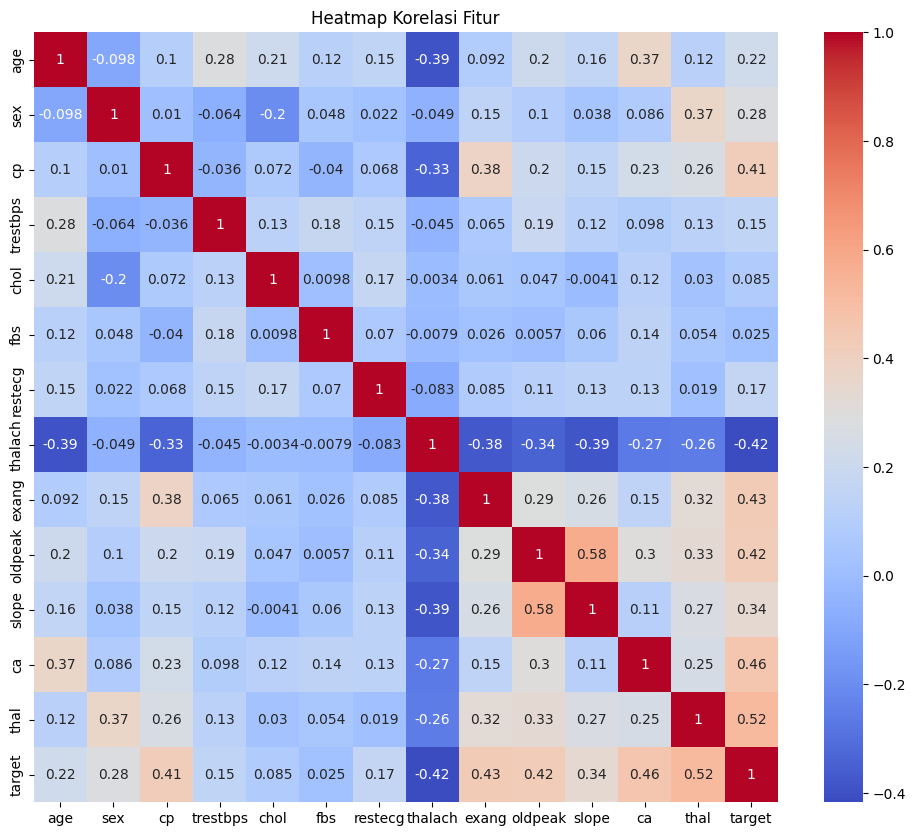

In [14]:
# Buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

### ALGORITMA K-NN

In [1]:
# mengimport library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# menginput data
data = pd.read_csv('Heart_disease_cleveland_new.csv')

In [3]:
X = data.drop('target', axis=1)
y = data['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# membuat model algoritma K-NN
knn = KNeighborsClassifier(n_neighbors=3)

In [7]:
# melatih model 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# prediksi
y_pred = knn.predict(X_test)

### EVALUASI

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Algoritma K-NN:", accuracy)

Akurasi Algoritma K-NN: 0.9180327868852459


### KESIMPULAN

- Dari data diatas, akurasi dari algoritma K-NN sebesar 0,91